### Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from typing import List, Dict
from IPython.display import display, HTML

warnings.filterwarnings("ignore")
%matplotlib inline

### Sample Data

In [41]:
# Sample data
data = [-123, 15, 20, 49, 48, 69, 28, 30, 22, 60, 300]

# Dataframe creation
df_sample = pd.DataFrame({"values":data})

# Index col creation
df_sample["index"] = range(len(df_sample))

# Type conversions
df_sample = df_sample.astype(dtype={"index":int, "values":int})

# Column sequence
df_sample = df_sample[["index","values"]]

# Data overview
df_sample.info()
display(HTML(df_sample.to_html()))
print("Missing values count: %s" %df_sample["values"].isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   11 non-null     int32
 1   values  11 non-null     int32
dtypes: int32(2)
memory usage: 220.0 bytes


,index,values
0,0,-123
1,1,15
2,2,20
3,3,49
4,4,48
5,5,69
6,6,28
7,7,30
8,8,22
9,9,60


Missing values count: 0


- Visualise Data

Text(0, 0.5, 'Values')

<Figure size 640x480 with 0 Axes>

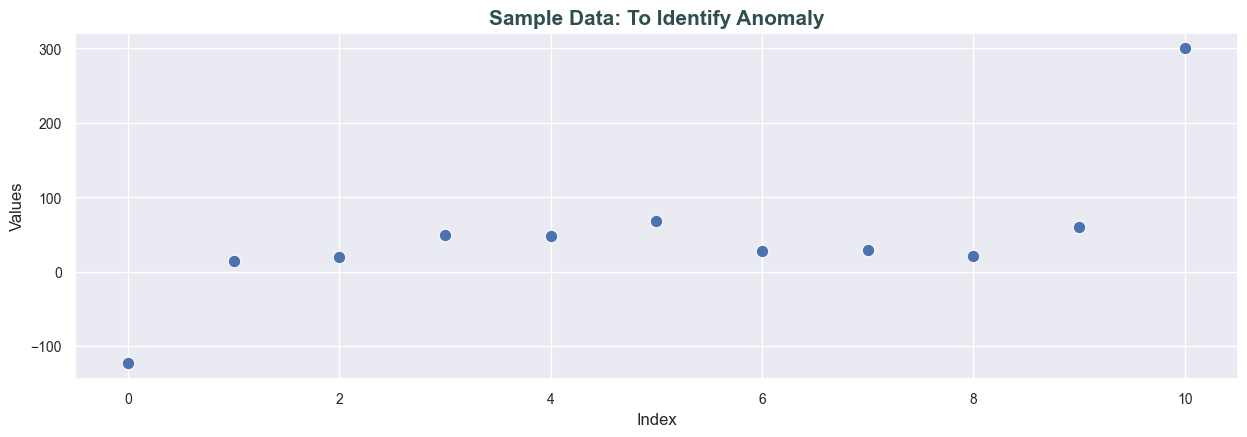

In [51]:
# Plot
plt.figure().clear() # clear earlier plot 
sns.set_theme(style="darkgrid") # Set theme
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4.5))
sns.scatterplot(x="index", y="values", data=df_sample, ax=ax, s=80, marker="o")
ax.set_title("Sample Data: To Identify Anomaly{}".format(""), fontsize=15, color= 'darkslategrey', fontweight='bold', loc='center')
# plt.xlim(0, 50)
# plt.ylim(0, 100)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel("Index")
plt.ylabel("Values")

<Figure size 640x480 with 0 Axes>

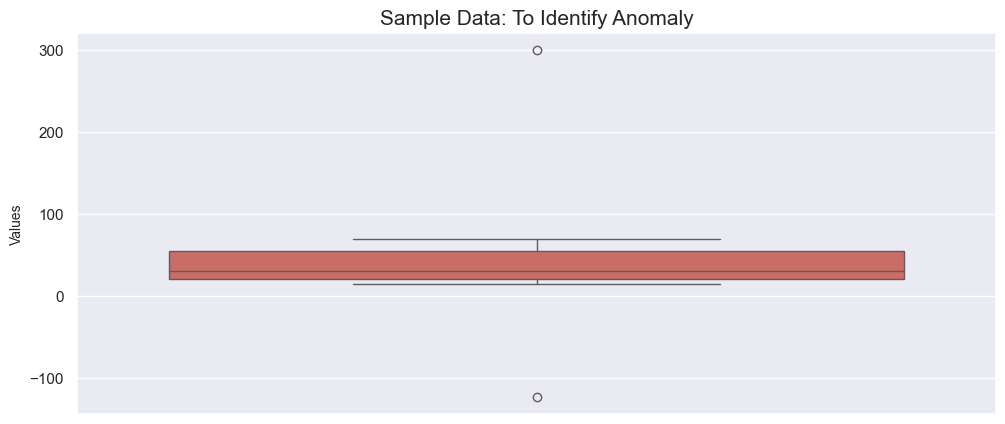

In [52]:
# Plot
plt.figure().clear() # clear earlier plot 
sns.set_theme(style="darkgrid") # set theme
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10, 4.5))
fig.tight_layout() 
sns.boxplot(y=df_sample['values'], palette='hls', ax=axes)
plt.title("Sample Data: To Identify Anomaly", size=15)
plt.ylabel("Values", size=10)
plt.show() 

### Identify Outliers

In [79]:
def detect_outliers(data: List) -> List:
    print("Data: %s" %data)
    quantile_1 = np.percentile(data, 25) # Q1
    quantile_3 = np.percentile(data, 75) # Q3
    # IQR = Inter Quantile Range
    iqr = quantile_3 - quantile_1
    lower_bound = quantile_1 - (1.5 * iqr)
    upper_bound = quantile_3 + (1.5 * iqr)
    print(f"Upper Bound --> {upper_bound}, Lower Bound --> {lower_bound}")
    outliers_found = [x for x in data if (x < lower_bound) | (x > upper_bound)]
    return outliers_found

In [80]:
outliers: List = detect_outliers(df_sample["values"].tolist())
print("Outlier Datapoints --> {0}".format(outliers))

Data: [-123, 15, 20, 49, 48, 69, 28, 30, 22, 60, 300]
Upper Bound --> 104.75, Lower Bound --> -29.25
Outlier Datapoints --> [-123, 300]


- Label data points as anomalies

In [81]:
df_sample["is_anomaly"] = np.where(df_sample["values"].isin(outliers), "anomaly", "not_anomaly")

df_sample

,index,values,is_anomaly
0,0,-123,anomaly
1,1,15,not_anomaly
2,2,20,not_anomaly
3,3,49,not_anomaly
4,4,48,not_anomaly
5,5,69,not_anomaly
6,6,28,not_anomaly
7,7,30,not_anomaly
8,8,22,not_anomaly
9,9,60,not_anomaly


<Figure size 640x480 with 0 Axes>

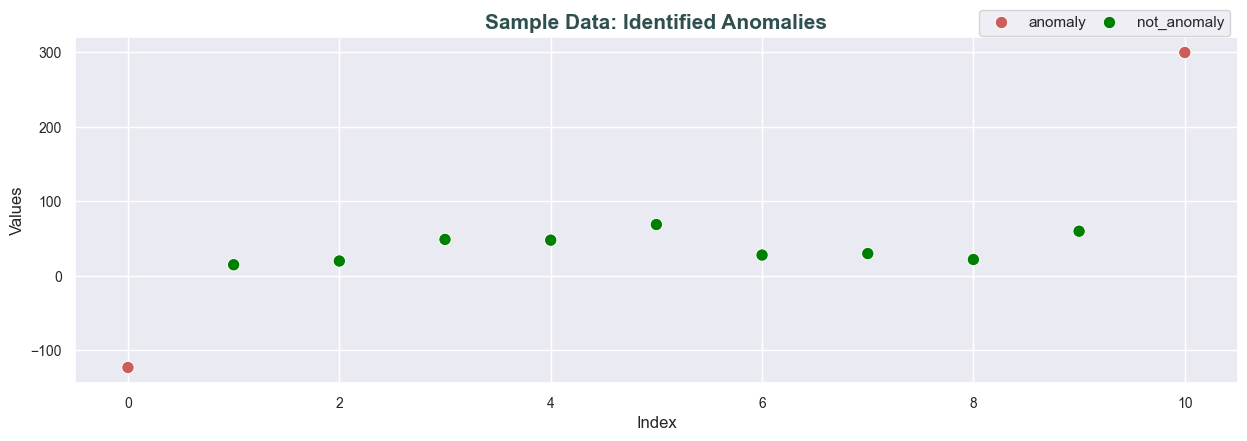

In [110]:
# Plot
plt.figure().clear() # clear earlier plot 
sns.set_theme(style="darkgrid") # Set theme
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4.5))
sns.scatterplot(x="index", y="values", data=df_sample, ax=ax, 
                s=80, marker="o", 
                hue="is_anomaly", palette=dict(anomaly="indianred", not_anomaly="green"),
                legend=True) # "Set2"
ax.set_title("Sample Data: Identified Anomalies{}".format(""), fontsize=15, color= 'darkslategrey', fontweight='bold', loc='center')
# plt.xlim(0, 50)
# plt.ylim(0, 100)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend(bbox_to_anchor=(0, 1, 1., .1), ncol=2, frameon=True, columnspacing=0.5) # loc='lower right': Move the legend to an empty part of the plot
plt.show()

Observation

- Based on IQR rule, [-123, 300] are data points behaves anomaly behaviour compared to IQR i.e., middle / most dense portion of data and it also breaches upper/lower bounds which is given room for variance, and beyond this bounds considered to be very rare based on underlying data.